<a href="https://colab.research.google.com/github/melkatewabe10/Machine-learning_LST-Estimation-/blob/main/Heat_map_of_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

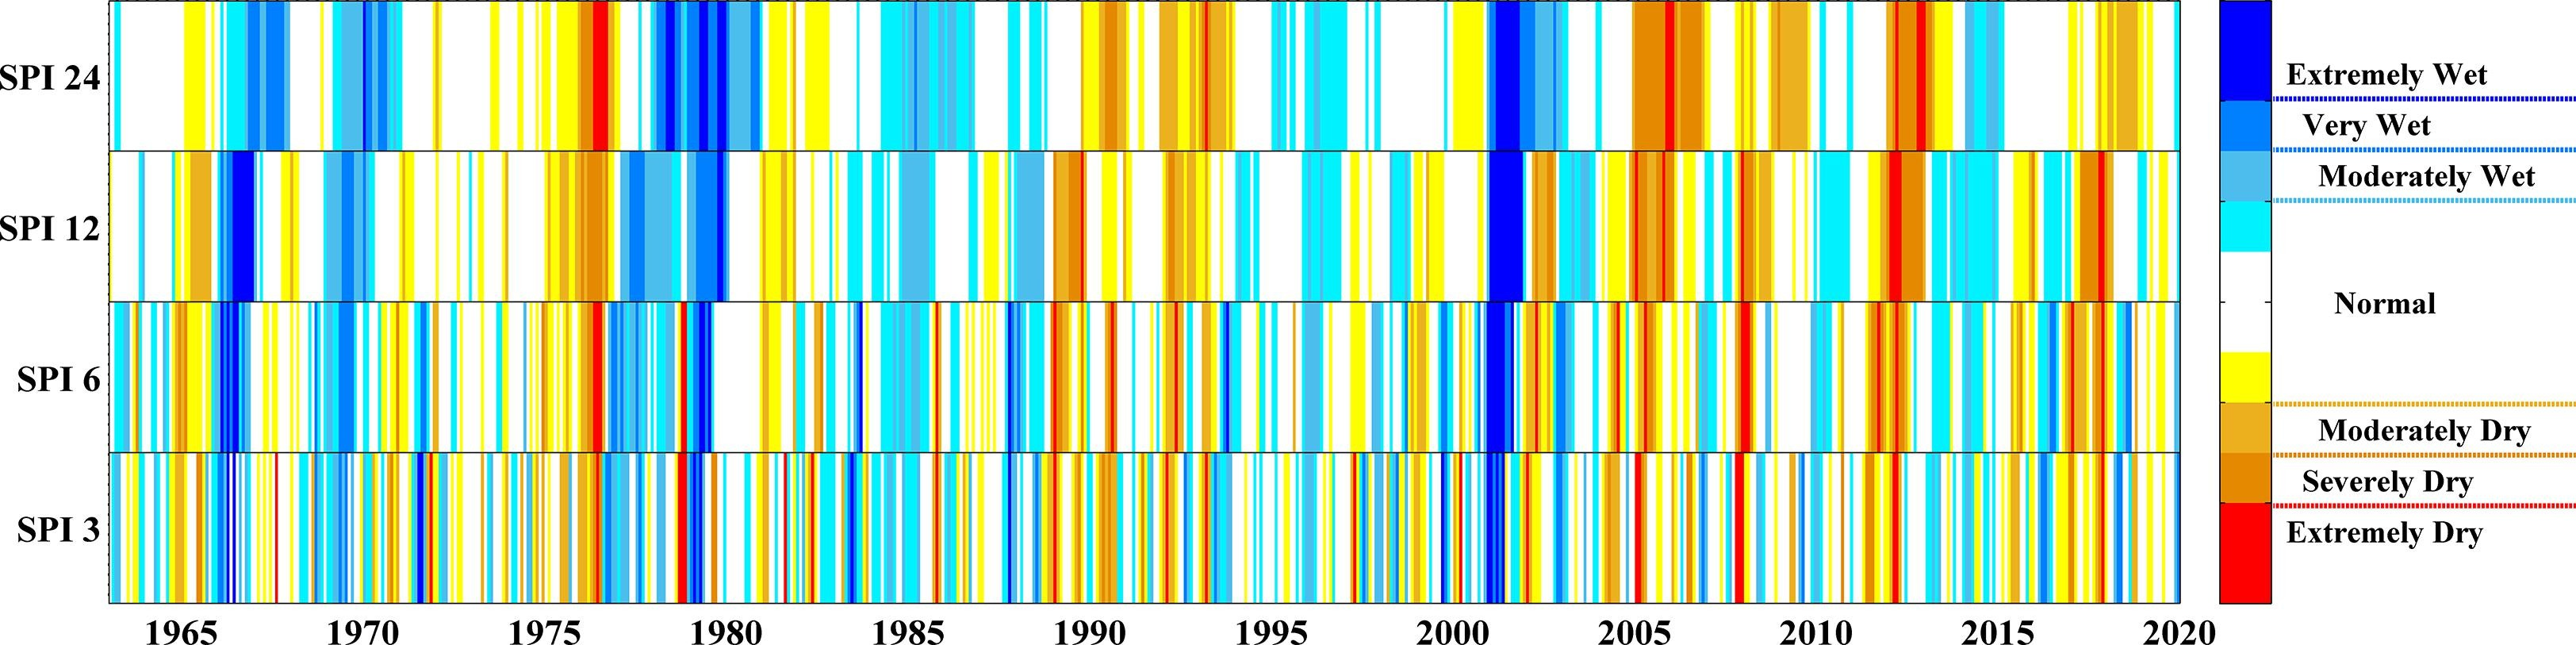

In [ ]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import seaborn as sns

# Folder containing your TIFF files (e.g. SM_2000.tif, ET_2000.tif, etc.)
folder_path = 'my_data_folder'  # <-- CHANGE to your folder

# The variables and years of interest
variables = ['SM', 'ET', 'P', 'LST']
years = range(2000, 2026)  # 2000 through 2025

# Prepare a 2D array to store the mean value for each (variable, year)
# Rows = variables, Columns = years
data_map = np.zeros((len(variables), len(years)), dtype=np.float32)

# Loop over each variable and year, read the TIFF, compute the mean
for i, var in enumerate(variables):
    for j, year in enumerate(years):
        # Construct the expected filename, e.g. SM_2000.tif
        filename = f"{var}_{year}.tif"
        filepath = os.path.join(folder_path, filename)

        # Open the GeoTIFF
        with rasterio.open(filepath) as src:
            arr = src.read(1).astype(np.float32)
            nodata_val = src.nodata

            # Mask out NoData if present
            if nodata_val is not None:
                arr = np.where(arr == nodata_val, np.nan, arr)

            # Compute mean ignoring NaNs
            mean_val = np.nanmean(arr)

        # Store the mean value in the data_map
        data_map[i, j] = mean_val

# data_map now has shape (4, 26): 4 rows (SM, ET, P, LST), 26 columns (years)

# Create a heatmap (stripe plot)
plt.figure(figsize=(12, 3))
sns.heatmap(
    data_map,
    cmap='RdYlBu_r',     # a diverging colormap (red to blue reversed)
    xticklabels=years,   # label columns with the years
    yticklabels=variables,
    cbar_kws={'label': 'Mean Value'},
    annot=False,         # set to True if you want numeric annotations
)

plt.title('Stripe Plot of SM, ET, P, LST (2000–2025)')
plt.xlabel('Year')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()
